Mounting google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import required packages

In [44]:
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

Read data from csv file

In [9]:
df = pd.read_csv("/content/Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


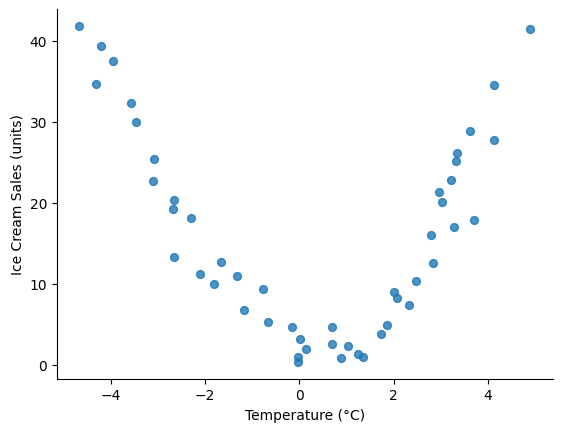

In [15]:
# @title Temperature (°C) vs Ice Cream Sales (units)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature (°C)', y='Ice Cream Sales (units)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Train model

In [59]:
X = df["Temperature (°C)"]
Y = df["Ice Cream Sales (units)"]

x_train, x_test, y_train, y_test = train_test_split(X,Y)

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train.to_frame())

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

Test model and visualize data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


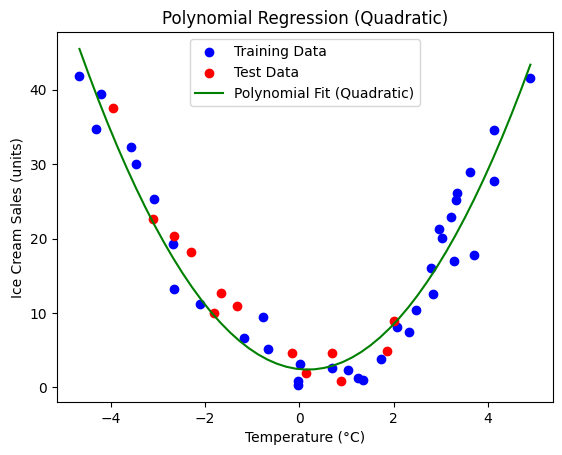

In [60]:
x_values = np.linspace(X.min(),X.max(), np.size(X)).reshape(-1,1)
x_values_poly = poly.transform(x_values)
y_values_predicted = model.predict(x_values_poly)


plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_values, y_values_predicted, color='green', label=f'Polynomial Fit (Quadratic)')
plt.title(f"Polynomial Regression (Quadratic)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()